# Visualization for demo code

In this notebook, we visualize the results of our demo code.

> You have to run all the scripts manually before visualizing the results.
> To do it properly, follow the instruction in the `README.md`.

## Basic experiment setup

For basic demo experiments we have implemented a VAE. We borrowed it from the [pytorch repo](https://github.com/pytorch/examples/tree/main/vae). 

**Goal:** implement VAE with different latent distributions (continuous and discrete)

**Toolkit:** `torch.distributions` package

The experiment setup is as follows:
1. In `vae.py` we implement basic VAE with manual reparametrization and sampling using `torch.randn()`. Note, that latent variables distribution is gaussian.
2. Then we change the code using the `torch.distributions` package. Resulting script is provided in the `vae_gaussian.py`. Notice the changes in `forward` and `loss_function`. Here the gaussian latent distribution was used again.
3. The most interesting is that we can change the latent distribution to discrete one. In `vae_bernoulli.py` we used a Bernoulli distribution in latent space. We implement it using `RelaxedBernoulli` distribution.
4. Finally, we also implemented VAE with categorical latent space, which is available in `vae_categorical.py`. For this purpose, we used `RelaxedOneHotCategorical`.

## Results

In [2]:
from matplotlib import pyplot as plt
from PIL import Image
import os

### Reconstructed samples

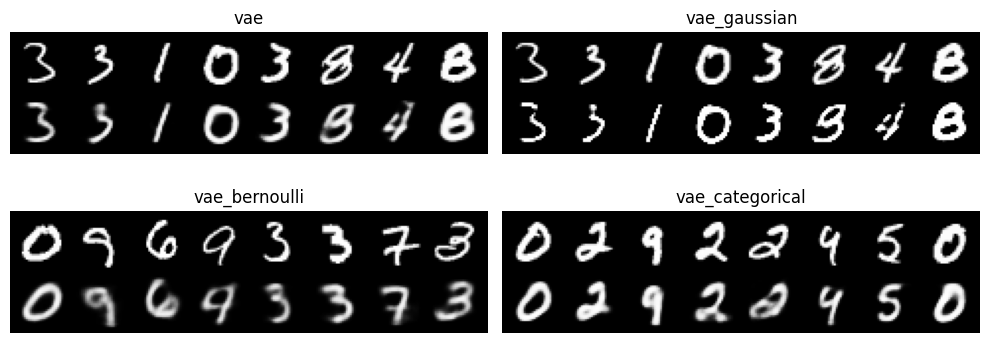

In [11]:
root_dir = './results'
experiment_names = ['vae', 'vae_gaussian', 'vae_bernoulli', 'vae_categorical']

fig, ax = plt.subplots(2, 2, figsize=(10, 4))

for idx, exp_name in enumerate(experiment_names):
    exp_dir = os.path.join(root_dir, exp_name)
    recon_samples = Image.open(os.path.join(exp_dir, 'reconstruction_10.png'))
    ax[idx // 2, idx % 2].imshow(recon_samples)
    ax[idx // 2, idx % 2].axis('off')
    ax[idx // 2, idx % 2].set_title(exp_name)

plt.tight_layout()

### Generated samples

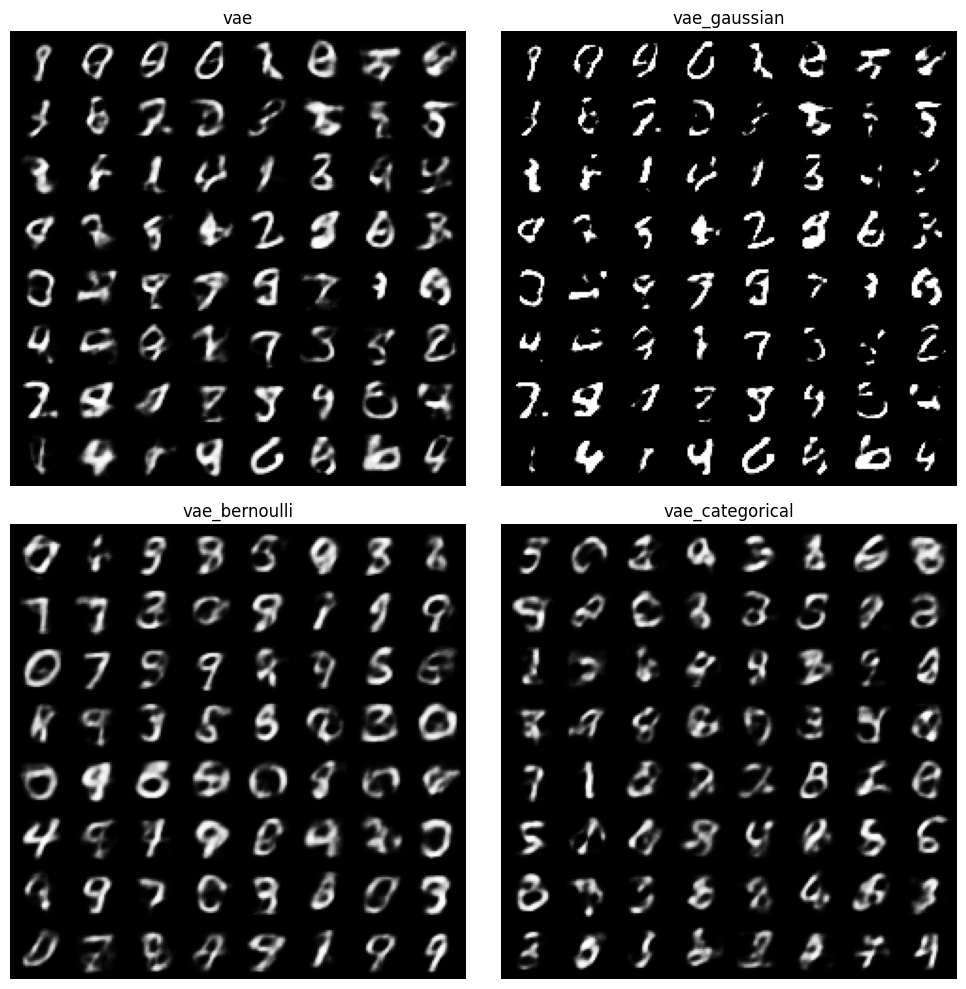

In [13]:
root_dir = './results'
experiment_names = ['vae', 'vae_gaussian', 'vae_bernoulli', 'vae_categorical']

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for idx, exp_name in enumerate(experiment_names):
    exp_dir = os.path.join(root_dir, exp_name)
    recon_samples = Image.open(os.path.join(exp_dir, 'sample_10.png'))
    ax[idx // 2, idx % 2].imshow(recon_samples)
    ax[idx // 2, idx % 2].axis('off')
    ax[idx // 2, idx % 2].set_title(exp_name)

plt.tight_layout()

### VAE Gaussian Bernoulli Visualization

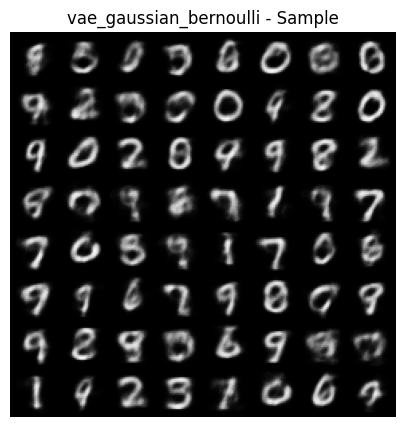

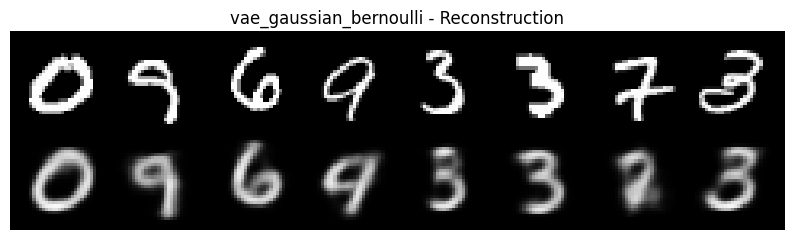

In [2]:
root_dir = './results'
experiment_names = ['vae_gaussian_bernoulli']

for exp_name in experiment_names:
    exp_dir = os.path.join(root_dir, exp_name)

    sample_image_path = os.path.join(exp_dir, 'sample_10.png')
    sample_image = Image.open(sample_image_path)

    reconstruction_image_path = os.path.join(exp_dir, 'reconstruction_10.png')
    reconstruction_image = Image.open(reconstruction_image_path)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(sample_image)
    ax.axis('off')
    ax.set_title(f'{exp_name} - Sample')
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(reconstruction_image)
    ax.axis('off')
    ax.set_title(f'{exp_name} - Reconstruction')
    plt.show()

### VAE Straight Through Bernoulli Visualization

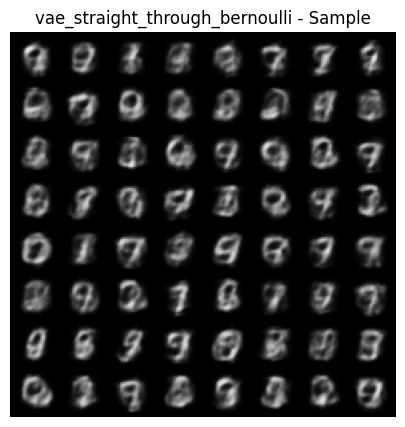

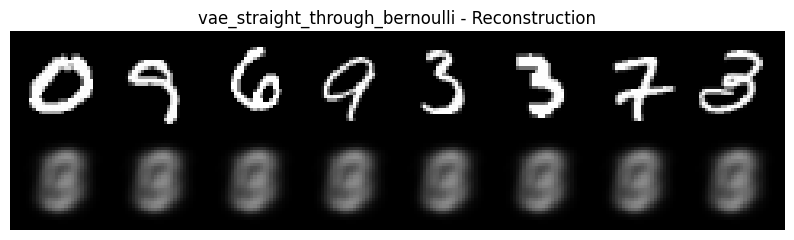

In [4]:
root_dir = './results'
experiment_names = ['vae_straight_through_bernoulli']

for exp_name in experiment_names:
    exp_dir = os.path.join(root_dir, exp_name)

    sample_image_path = os.path.join(exp_dir, 'sample_10.png')
    sample_image = Image.open(sample_image_path)

    reconstruction_image_path = os.path.join(exp_dir, 'reconstruction_10.png')
    reconstruction_image = Image.open(reconstruction_image_path)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(sample_image)
    ax.axis('off')
    ax.set_title(f'{exp_name} - Sample')
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(reconstruction_image)
    ax.axis('off')
    ax.set_title(f'{exp_name} - Reconstruction')
    plt.show()

### VAE Hard Concrete Visualization

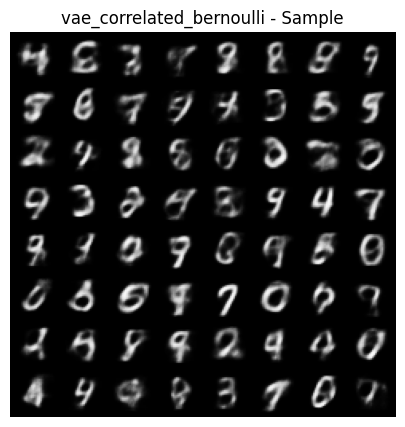

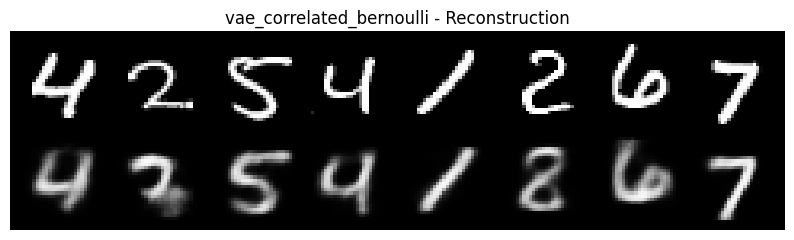

In [4]:
root_dir = './results'
experiment_names = ['vae_correlated_bernoulli']

for exp_name in experiment_names:
    exp_dir = os.path.join(root_dir, exp_name)

    sample_image_path = os.path.join(exp_dir, 'sample_10.png')
    sample_image = Image.open(sample_image_path)

    reconstruction_image_path = os.path.join(exp_dir, 'reconstruction_10.png')
    reconstruction_image = Image.open(reconstruction_image_path)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(sample_image)
    ax.axis('off')
    ax.set_title(f'{exp_name} - Sample')
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.imshow(reconstruction_image)
    ax.axis('off')
    ax.set_title(f'{exp_name} - Reconstruction')
    plt.show()

In [ ]:
n = 20 #torch.manual_seed(42)
A = torch.randn(n, n)
B = (A + A.T) / 2
epsilon = 1e-5
self.R = (B @ B.T + epsilon * torch.eye(n)).to(device)